### Mustafa Kutay Yabas - CSE551 - 01.10.2016

## Assignment #1 - Finite Difference Method for Laplacian

$\nabla^{2}T=0$

$\nabla^{2}T= \frac{\partial^{2}T}{\partial x^{2}} + \frac{\partial^{2}T}{\partial y^{2}}$

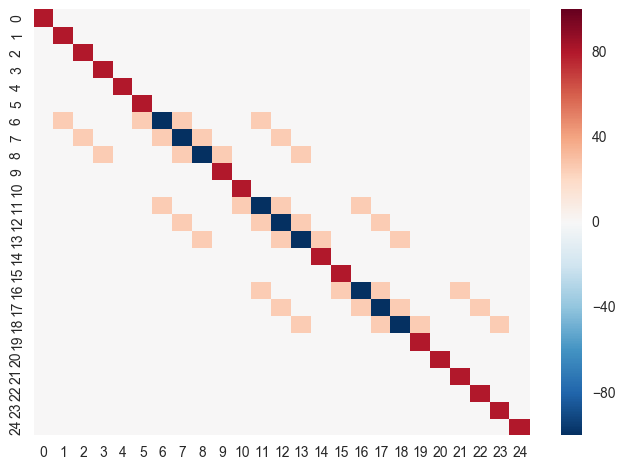

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

msize = 5  # mesh size, square mesh, one side

coeffs = (1.0,-2.0,1.0)
dx = 1.0/float(msize)

def getn(i, j):
    return i * msize + j
    pass


ssize = msize * msize  # stiffness matrix size
# gen. stiffness matrix.
stiffness = [[0.0 for x in range(ssize)] for y in range(ssize)]
source = [0.0 for x in range(ssize)]


# Set Source Vector
# row = 1, colum = 1:msize = 100C
for j in range(0, msize):
    n = getn(0, j)
    source[n] = 100.0
    pass

# print source

# Set Stiffness Matrix
# Outer Boundaries = 1


for i in range(0, 1):
    for j in range(0, msize):
        stiffness[getn(i, j)][j] = 1.0
        pass

for i in range(1, msize):
    for j in range(0, 1):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(1, msize):
    for j in range(msize - 1, msize):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(msize-1,msize):
    for j in range(0,msize):
        n = getn(i,j)
        stiffness[n][n] = 1.0
        pass


# Inside # for Derivative 2 Accuracy 2

for i in range (1,msize-1):     # select all-
    for j in range(1,msize-1):  # inner nodes

        nr = getn(i,j) # current row of the stiffness  matrix
        #print i,j,n

        for coin in range(-1,2):
            nc = getn(i+coin, j)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2) # += is important :)

        for coin in range(-1,2):
            nc = getn(i, j+coin)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2)

        pass

import copy
visual = copy.deepcopy(stiffness) #copy
for i in range(ssize):
    for j in range(ssize):
        if visual[i][j] == 1:
            visual[i][j] = 80.0 #dummy for visualization
            
#visual of the stiffness matrix
sns.set()
sns.heatmap(visual)
plt.show()

In [2]:
print source

[100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [3]:
soln = np.linalg.solve(stiffness, source)
print soln
# there are some negative values!? Something may be wrong.

[  1.00000000e+02   1.00000000e+02   1.00000000e+02   1.00000000e+02
   1.00000000e+02   0.00000000e+00   4.28571429e+01   5.26785714e+01
   4.28571429e+01   0.00000000e+00   1.42108547e-14   1.87500000e+01
   2.50000000e+01   1.87500000e+01  -1.68753900e-14  -3.55271368e-15
   7.14285714e+00   9.82142857e+00   7.14285714e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


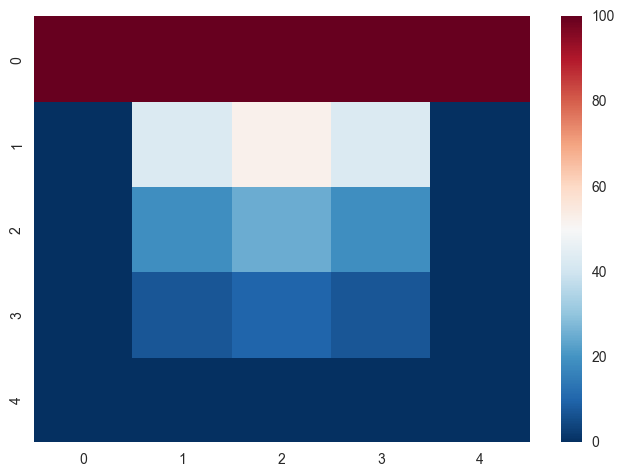

In [4]:
soln_matrix = np.reshape(soln, (msize, msize))

sns.set()
sns.heatmap(soln_matrix, vmin=0,vmax=100,center=50)
plt.show()

## Wow! Now increase the resolution :)

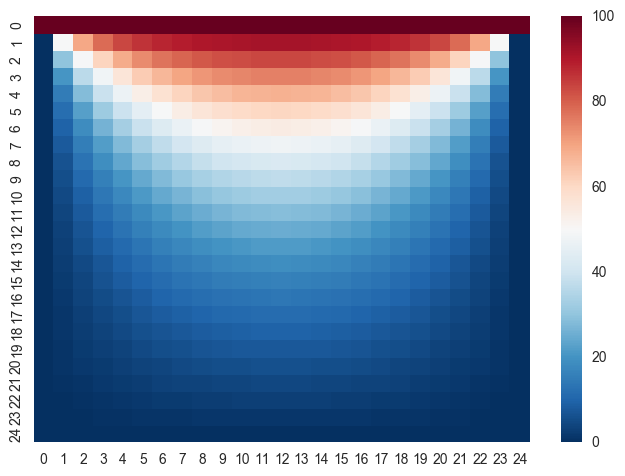

In [5]:
# I can't wait to define functions to see the result so I will just repeat the code :)

msize = 25  # mesh size, square mesh, one side
dx = 1.0/float(msize)

def getn(i, j):
    return i * msize + j
    pass


ssize = msize * msize  # stiffness matrix size
# gen. stiffness matrix.
stiffness = [[0.0 for x in range(ssize)] for y in range(ssize)]
source = [0.0 for x in range(ssize)]


# Set Source Vector
# row = 1, colum = 1:msize = 100C
for j in range(0, msize):
    n = getn(0, j)
    source[n] = 100.0
    pass

# print source

# Set Stiffness Matrix
# Outer Boundaries = 1


for i in range(0, 1):
    for j in range(0, msize):
        stiffness[getn(i, j)][j] = 1.0
        pass

for i in range(1, msize):
    for j in range(0, 1):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(1, msize):
    for j in range(msize - 1, msize):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(msize-1,msize):
    for j in range(0,msize):
        n = getn(i,j)
        stiffness[n][n] = 1.0
        pass


# Inside # for Derivative 2 Accuracy 2

for i in range (1,msize-1):     # select all-
    for j in range(1,msize-1):  # inner nodes

        nr = getn(i,j) # current row of the stiffness  matrix
        #print i,j,n

        for coin in range(-1,2):
            nc = getn(i+coin, j)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2) # += is important :)

        for coin in range(-1,2):
            nc = getn(i, j+coin)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2)

        pass

soln = np.linalg.solve(stiffness, source)
soln_matrix = np.reshape(soln, (msize, msize))

sns.set()
sns.heatmap(soln_matrix, vmin=0,vmax=100,center=50)
plt.show()

## Change the source vector

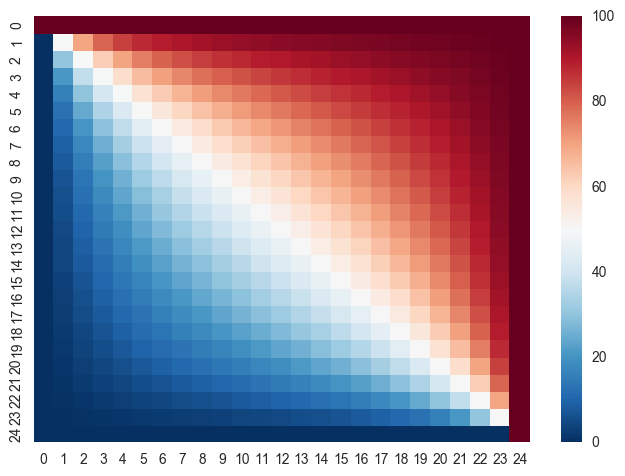

In [6]:
# I can't wait to define functions to see the result so I will just AGAIN! repeat the code :)

msize = 25  # mesh size, square mesh, one side
dx = 1.0/float(msize)

def getn(i, j):
    return i * msize + j
    pass


ssize = msize * msize  # stifness matrix size
# gen. stiffness matrix.
stiffness = [[0.0 for x in range(ssize)] for y in range(ssize)]
source = [0.0 for x in range(ssize)]


# Set Source Vector
# row = 1, colum = 1:msize = 100C
for j in range(0, msize):
    n = getn(0, j)
    source[n] = 100.0
    pass

for i in range(0, msize):
    n = getn(i, msize-1)
    source[n] = 100.0
    pass

# print source

# Set Stiffness Matrix
# Outer Boundaries = 1


for i in range(0, 1):
    for j in range(0, msize):
        stiffness[getn(i, j)][j] = 1.0
        pass

for i in range(1, msize):
    for j in range(0, 1):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(1, msize):
    for j in range(msize - 1, msize):
        n = getn(i, j)
        stiffness[n][n] = 1.0
        pass

for i in range(msize-1,msize):
    for j in range(0,msize):
        n = getn(i,j)
        stiffness[n][n] = 1.0
        pass


# Inside # for Derivative 2 Accuracy 2

for i in range (1,msize-1):     # select all-
    for j in range(1,msize-1):  # inner nodes

        nr = getn(i,j) # current row of the stiffness  matrix
        #print i,j,n

        for coin in range(-1,2):
            nc = getn(i+coin, j)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2) # += is important :)

        for coin in range(-1,2):
            nc = getn(i, j+coin)
            stiffness[nr][nc] += coeffs[coin+1] / pow(dx,2)

        pass

soln = np.linalg.solve(stiffness, source)
soln_matrix = np.reshape(soln, (msize, msize))

sns.set()
sns.heatmap(soln_matrix, vmin=0,vmax=100,center=50)
plt.show()